In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
import pandas as pd
import numpy as np
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [2]:
from data_reader import read_banking_sample_results
from results_helper_functions import merge_data
data = read_banking_sample_results()
merged_data = merge_data(data)

The following samples had no similar pairs
sample_2, sample_5, sample_20, sample_24, sample_26, sample_27, sample_31, sample_32, sample_33, sample_41, sample_53, sample_58, sample_59, sample_61, sample_67, sample_75, sample_86, sample_87, sample_89, sample_95


In [3]:
unique_nodes = np.unique(data["model_node"])
for node in unique_nodes:
    average_baseline_score = data["model_r2"].loc[data.model_node == node].mean()
    print(f"{node} ({round(average_baseline_score, 2)})", end = " ")
print()

pi2 (0.96) pi3 (0.96) pi4 (0.96) pi5 (0.96) 


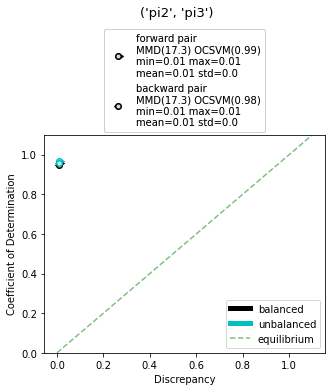

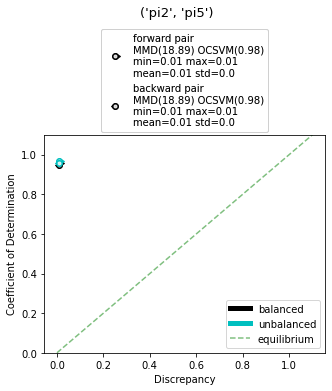

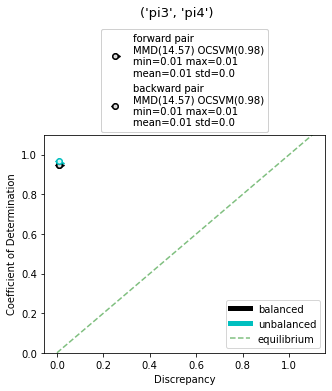

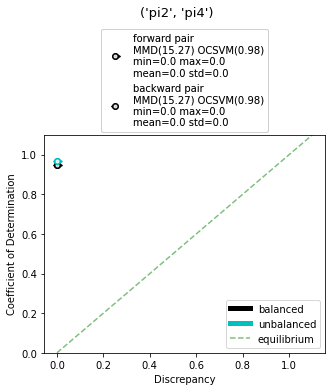

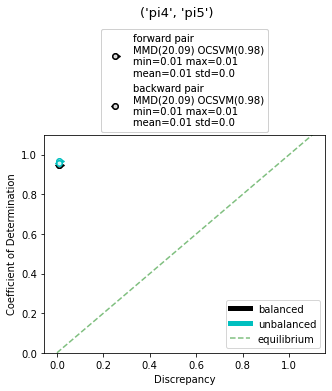

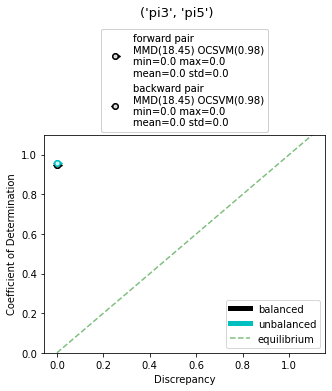

In [4]:
from visualising import plot_banking_r2_discrepancy
plot_banking_r2_discrepancy(merged_data)

In [5]:
from metrics import combined_precision
print("Combined Precision \n")
combined_precision(data)
combined_precision(data, per_model_type=True)

Combined Precision 

0.6: 0.41 (strict=True), 1.0 (strict=False), 
0.8: 0.41 (strict=True), 1.0 (strict=False), 

balanced=True
0.6: 0.62 (strict=True), 1.0 (strict=False), 
0.8: 0.62 (strict=True), 1.0 (strict=False), 

balanced=False
0.6: 0.43 (strict=True), 1.0 (strict=False), 
0.8: 0.43 (strict=True), 1.0 (strict=False), 



In [6]:
from metrics import ocsvm_precision
print("OCSVM Precision \n")
ocsvm_precision(data)
ocsvm_precision(data, per_model_type=True)

OCSVM Precision 

0.41 (strict=True), 1.0 (strict=False), 
balanced=True: 0.41 (strict=True), 1.0 (strict=False), 
balanced=False: 0.41 (strict=True), 1.0 (strict=False), 


In [7]:
from metrics import mmd_precision
print("MMD Precision \n")
mmd_precision(data)
mmd_precision(data, per_model_type=True)

MMD Precision 

0.85: 1.0
0.9: 1.0
0.95: 1.0

balanced=True
0.85: 1.0
0.9: 1.0
0.95: 1.0

balanced=False
0.85: 1.0
0.9: 1.0
0.95: 1.0



In [8]:
from metrics import banking_speedup
print(banking_speedup(data, 8)) 

0.21


In [9]:
from results_helper_functions import data_summary
data_summary(data)
data_summary(data, best_entry=True)

unbalanced models have higher baseline R2 scores and unbalanced models have lower discrepancy. 
unbalanced models yield the best results on average. 

The number of entries per model type are True=35, False=158
unbalanced models have higher baseline R2 scores and balanced models have lower discrepancy. 
unbalanced models yield the best results on average. 

